# Credit Card Fraud Detection using CNN

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #for spliting the data 
from sklearn.preprocessing import StandardScaler # for scaling the data

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

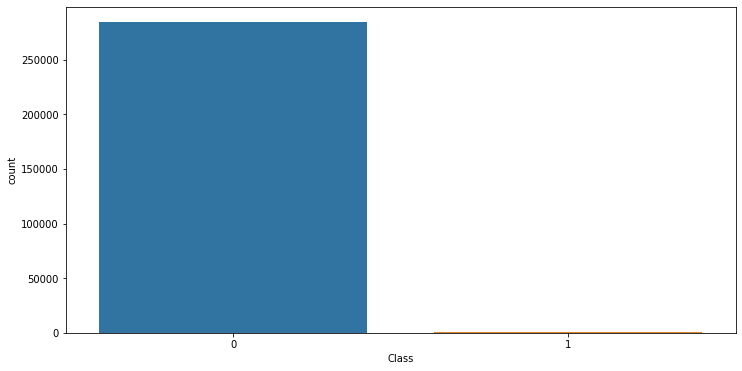

In [9]:
import warnings as wr 
wr.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(df['Class'])

In [10]:
non_fraud=df[df['Class']==0]
fraud=df[df['Class']==1]

In [13]:
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [17]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68169,52865.0,1.150810,-0.087164,1.272282,1.353043,-1.054827,-0.226353,-0.609509,0.132040,1.006103,...,-0.070527,-0.034249,0.003838,0.362632,0.388630,-0.406230,0.067508,0.036709,9.99,0
173182,121378.0,1.985636,-0.155736,-1.679648,0.373507,0.370316,-0.234064,-0.168658,-0.065338,0.842703,...,-0.090250,-0.205003,0.110374,-0.048089,-0.155671,0.451717,-0.043566,-0.019533,50.00,0
175348,122292.0,-0.881493,0.327654,2.148261,-1.172474,0.571878,-0.101243,0.502490,-0.005394,0.210775,...,0.275340,0.951304,-0.631496,-0.302657,0.838330,-0.128640,-0.129587,-0.175142,5.84,0
163192,115733.0,2.184382,-1.510631,-1.061898,-1.637719,-1.139437,-0.371079,-1.101685,-0.070473,-1.475787,...,-0.098272,0.065533,0.223878,0.741204,-0.208124,-0.220295,-0.009370,-0.047387,56.66,0
226628,144724.0,-1.546927,0.166883,0.263978,-0.079107,2.973322,-1.769382,1.144760,-0.316619,-1.211042,...,0.235687,0.293410,-0.576729,-0.636484,1.598714,-0.337192,-0.071552,0.048514,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144374,86072.0,-1.222208,-1.079052,-1.188102,2.478048,1.472813,4.807976,-0.552632,-1.879795,-1.844786,...,-1.076483,-0.867124,-0.590150,1.002750,0.460010,0.042277,-0.041296,0.359816,705.35,0
178459,123633.0,-0.809640,0.371254,0.097805,-0.477265,0.252787,-0.867459,1.579549,-0.149077,0.156742,...,-0.081203,-0.474715,0.206414,-0.193423,0.098982,-0.086995,0.035195,0.172033,191.21,0
40282,40172.0,1.175131,-1.024843,0.947213,-0.693419,-1.227897,0.519901,-1.219507,0.268884,-0.424666,...,0.408867,1.140311,-0.187477,-0.225674,0.393002,-0.022581,0.053882,0.020678,72.00,0
160554,113454.0,-0.554176,0.211572,-0.889387,-1.847511,3.522009,3.083584,0.254988,0.855140,-0.263356,...,0.386225,0.966072,-0.315874,0.725261,0.272669,-0.442016,0.158529,0.153214,1.00,0


In [18]:
data=fraud.append(non_fraud,ignore_index=True)

In [19]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,86072.0,-1.222208,-1.079052,-1.188102,2.478048,1.472813,4.807976,-0.552632,-1.879795,-1.844786,...,-1.076483,-0.867124,-0.590150,1.002750,0.460010,0.042277,-0.041296,0.359816,705.35,0
980,123633.0,-0.809640,0.371254,0.097805,-0.477265,0.252787,-0.867459,1.579549,-0.149077,0.156742,...,-0.081203,-0.474715,0.206414,-0.193423,0.098982,-0.086995,0.035195,0.172033,191.21,0
981,40172.0,1.175131,-1.024843,0.947213,-0.693419,-1.227897,0.519901,-1.219507,0.268884,-0.424666,...,0.408867,1.140311,-0.187477,-0.225674,0.393002,-0.022581,0.053882,0.020678,72.00,0
982,113454.0,-0.554176,0.211572,-0.889387,-1.847511,3.522009,3.083584,0.254988,0.855140,-0.263356,...,0.386225,0.966072,-0.315874,0.725261,0.272669,-0.442016,0.158529,0.153214,1.00,0


In [22]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [37]:
X=data.drop('Class',axis=1)
y=data['Class']

In [40]:
X.shape,y.shape

((984, 30), (984,))

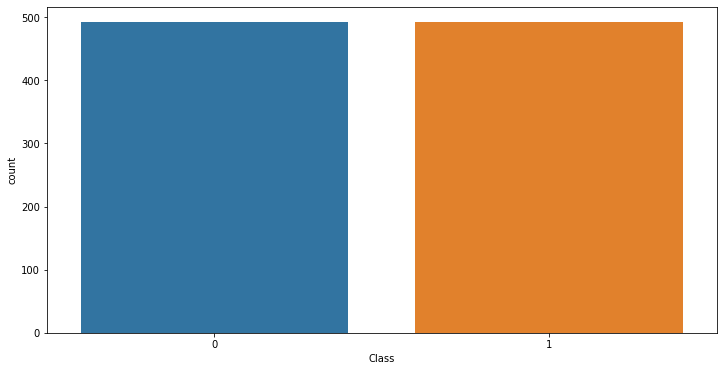

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data['Class'])

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify = y)

In [46]:
X_train.shape,X_test.shape

((787, 30), (197, 30))

In [47]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [54]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [57]:
y_train.shape,y_test.shape

((787,), (197,))

In [55]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [60]:
X_train.shape,X_test.shape
X_train[0].shape

(30, 1)

# Build CNN Model

In [59]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.1


In [67]:
epochs=20
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_3 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [70]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test, y_test),verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 26ms/step - loss: 0.1159 - accuracy: 0.9568 - val_loss: 0.1984 - val_accuracy: 0.9188
Epoch 2/20
25/25 [==============================] - 0s 15ms/step - loss: 0.1154 - accuracy: 0.9568 - val_loss: 0.2004 - val_accuracy: 0.9188
Epoch 3/20
25/25 [==============================] - 0s 18ms/step - loss: 0.1264 - accuracy: 0.9530 - val_loss: 0.1980 - val_accuracy: 0.9239
Epoch 4/20
25/25 [==============================] - 0s 18ms/step - loss: 0.1228 - accuracy: 0.9543 - val_loss: 0.2001 - val_accuracy: 0.9188
Epoch 5/20
25/25 [==============================] - 0s 17ms/step - loss: 0.1200 - accuracy: 0.9670 - val_loss: 0.2073 - val_accuracy: 0.9188
Epoch 6/20
25/25 [==============================] - 0s 18ms/step - loss: 0.1047 - accuracy: 0.9632 - val_loss: 0.2081 - val_accuracy: 0.9188
Epoch 7/20
25/25 [==============================] - 0s 16ms/step - loss: 0.1065 - accuracy: 0.9543 - val_loss: 0.2078 - val_accuracy: 0.9188
Epoch 8/20
25

In [73]:
history

In [80]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

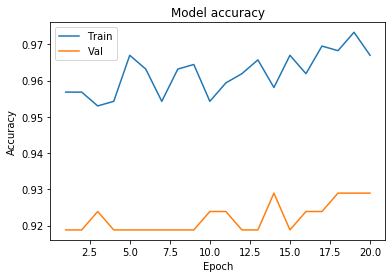

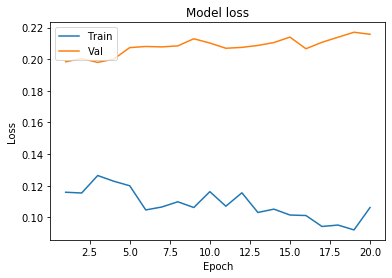

In [81]:
plot_learningCurve(history,epochs)

# Adding Maxpool Layer

In [82]:
epochs=20
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 0.7055 - accuracy: 0.6115 - val_loss: 0.6408 - val_accuracy: 0.6904
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5389 - accuracy: 0.7333 - val_loss: 0.6194 - val_accuracy: 0.8020
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4321 - accuracy: 0.8365 - val_loss: 0.5995 - val_accuracy: 0.8223
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.8402 - val_loss: 0.5743 - val_accuracy: 0.8325
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3126 - accuracy: 0.8741 - val_loss: 0.5485 - val_accuracy: 0.8223
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 0.8736 - val_loss: 0.5197 - val_accuracy: 0.8274
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.2847 - accuracy: 0.9147 - val_loss: 0.4872 - val_accuracy: 0.8376
Epoch 8/20
25/25 [=

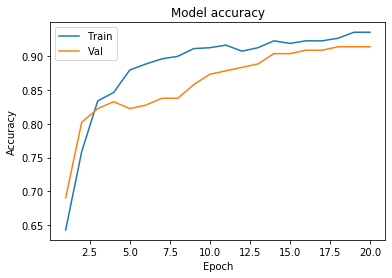

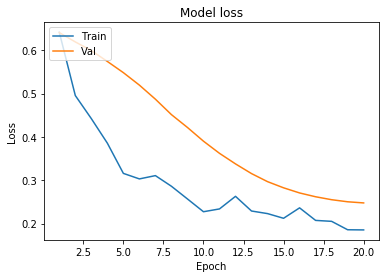

In [83]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)